In [5]:
import torch
import torch.nn as nn
from d2l import torch as d2l

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def l1_penalty(w):
    return torch.sum(torch.abs(w))

def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        
        if (epoch + 1) % 5 == 0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss), 
                        d2l.evaluate_loss(net, test_iter, loss)))

    print('w 的 L2 范数：', torch.norm(w).item())

w 的 L2 范数： 12.83367919921875


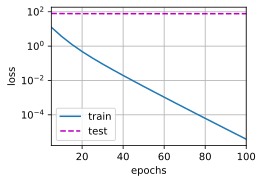

In [6]:
train(lambd=0)

w 的 L2 范数： 0.09370779991149902


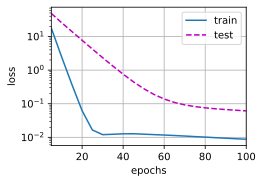

In [15]:
train(lambd=5)

w 的 L2 范数： 0.037731464952230453


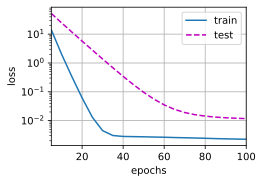

In [16]:
train(lambd=6)

w 的 L2 范数： 0.026884054765105247


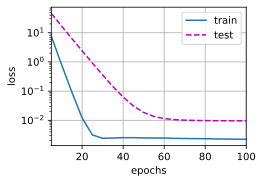

In [17]:
train(lambd=8)

w 的 L2 范数： 0.045774661004543304


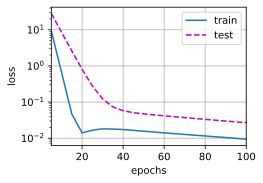

In [18]:
train(lambd=10)

w 的 L2 范数： 0.017247796058654785


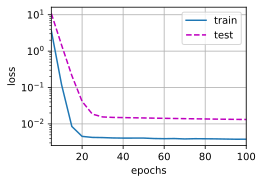

In [19]:
train(lambd=16)

In [22]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()

    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        "weight_decay": wd}, {
        "params": net[0].bias
    }], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        
        if (epoch + 1) % 5 == 0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss), 
                        d2l.evaluate_loss(net, test_iter, loss)))
            

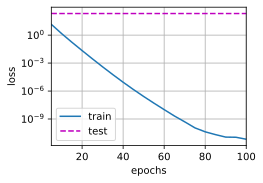

In [23]:
train_concise(0)

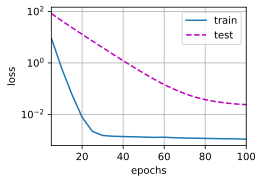

In [24]:
train_concise(5)

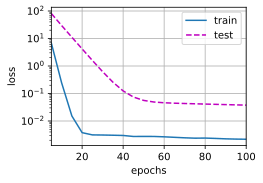

In [26]:
train_concise(8)